In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_result_analysis import get_df, plot_metric

In [3]:
df_lfw_baseline = get_df("plain_baseline", "lfw", "v001_18052024")
df_lfw_sketch = get_df("image_sketching", "lfw", "v001_final")
df_utk_baseline = get_df("plain_baseline", "utk_face", "v002_target_age_25_bins_3")
df_utk_sketch = get_df("image_sketching", "utk_face", "v002_age_25")
df_fair_face_age = get_df("plain_baseline", "fair_face", "v001_target_age", "Target Age")
df_fair_face_gender = get_df("plain_baseline", "fair_face", "v2_target_gender", "Target Gender")

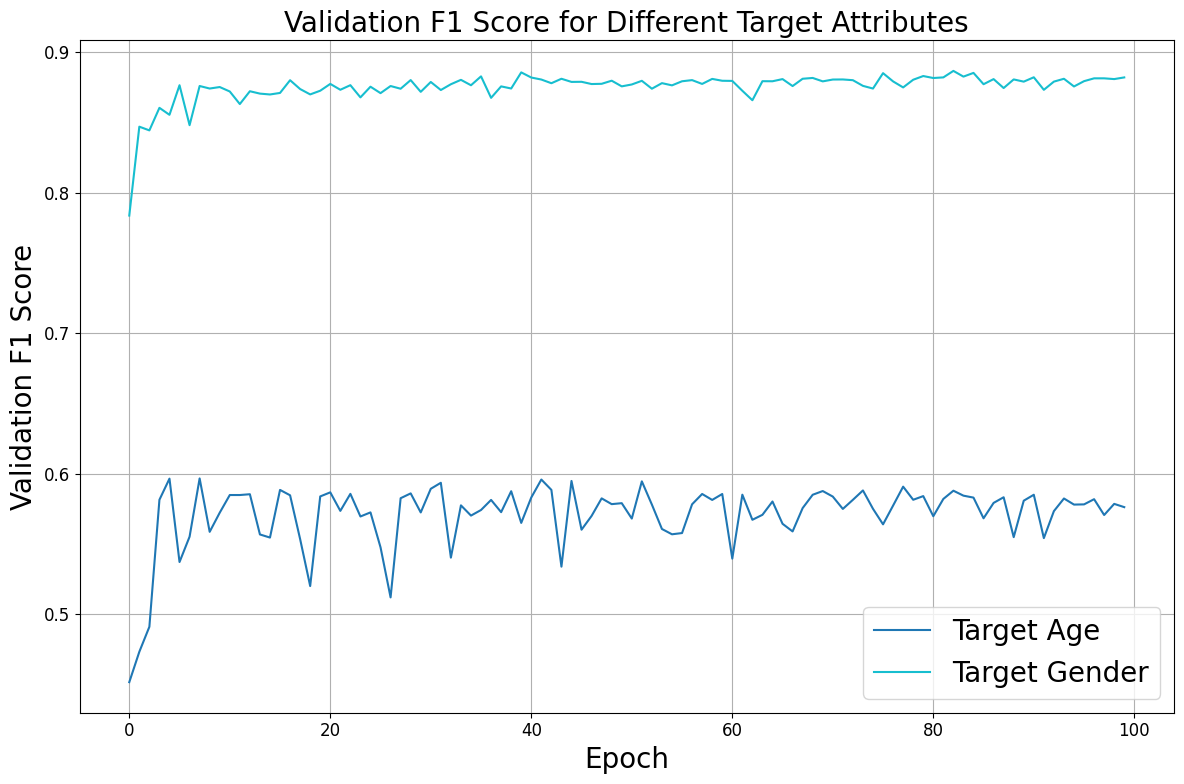

In [8]:
plot_metric([df_fair_face_age, df_fair_face_gender], "valid_f1", title="Validation F1 Score for Different Target Attributes", save_fig_path="fair_face_dataset_target_attributes_validation", y_label="Validation F1 Score", fontsize=20)

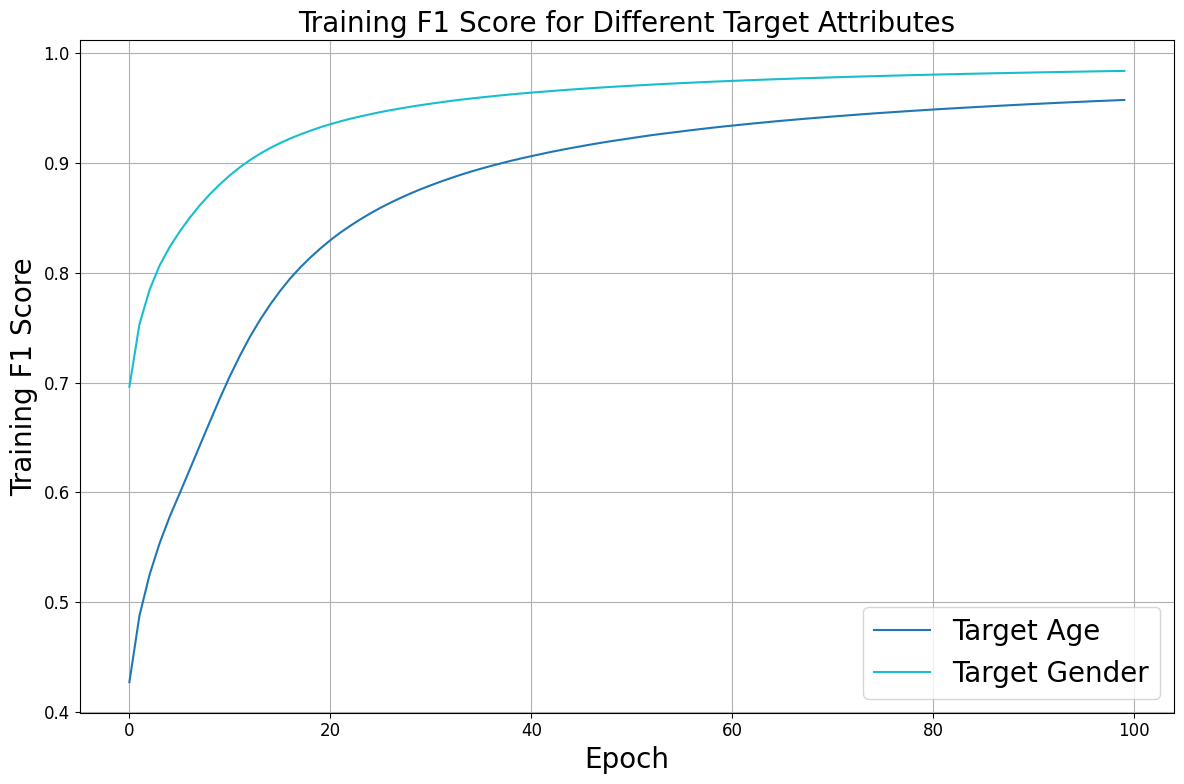

In [9]:
plot_metric([df_fair_face_age, df_fair_face_gender], "train_f1", title="Training F1 Score for Different Target Attributes", save_fig_path="fair_face_dataset_target_attributes_train", y_label="Training F1 Score", fontsize=20)

In [8]:
plot_metric([df_lfw_baseline, df_lfw_sketch], "valid_f1", smoothing_factor=0.7)

In [9]:
plot_metric([df_lfw_baseline, df_lfw_sketch], "train_eod")

In [10]:
plot_metric([df_lfw_baseline, df_lfw_sketch], "valid_eod", smoothing_factor=0.7)

In [11]:
plot_metric([df_utk_sketch, df_utk_baseline], "train_f1")

In [12]:
plot_metric([df_utk_baseline, df_utk_sketch], "valid_f1", smoothing_factor=0.7)

In [13]:
plot_metric([df_utk_baseline, df_utk_sketch], "train_eod")

In [14]:
plot_metric([df_utk_baseline, df_utk_sketch], "valid_eod", smoothing_factor=0.7)

# Overall performance

- Orthogonal performs bad
- Adversarial debiasing interesting difference between the two variants

In [3]:
def get_all_dfs(dataset_name, version, baseline_version=None):
    if baseline_version is None:
        df_baseline = get_df("plain_baseline",  dataset_name, version, "Baseline")
        pass
    else:
        df_baseline = get_df("plain_baseline",  dataset_name, baseline_version, "Baseline")

    df_sketch = get_df("image_sketching", dataset_name, version, "Image Sketching")
    df_adv = get_df("adversarial_debiasing", dataset_name, version, "Adversarial Debiasing")
    df_base = get_df("base_loss_optimization", dataset_name, version, "BASE Loss")
    df_domain = get_df("domain_independent_learning", dataset_name, version, "Domain Independent Training")
    df_ent = get_df("entangling_disentangling", dataset_name, version, "Entangling Disentangling")
    df_contras = get_df("fair_contrastive", dataset_name, version+"_classifier", "Contrastive Learning")
    df_feat_dist = get_df("fair_feat_distill", dataset_name, version, "Feature Distillation")
    df_orth = get_df("orthogonal_representations", dataset_name, version+"_target", "Orthogonal Representations")
    df_shared_adv_encoder = get_df("shared_adv_encoder", dataset_name, version, "Adversarial Shared Encoder")

    return [df_baseline, df_sketch, df_adv, df_base, df_domain, df_ent, df_contras, df_feat_dist, df_orth, df_shared_adv_encoder]

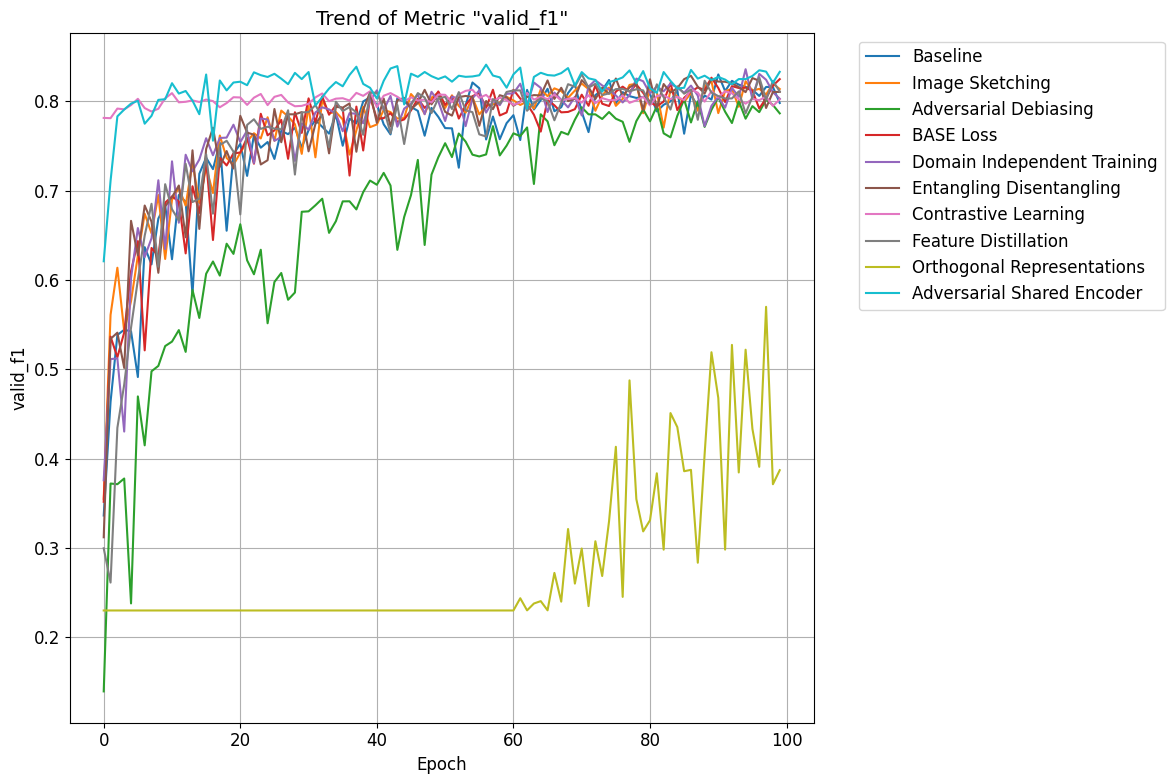

In [6]:
utk_metrics = get_all_dfs("utk_face", "v003_target_age_19_data_augmentation", "v003_target_age_19_data_augmentation")
plot_metric(utk_metrics, "valid_f1")

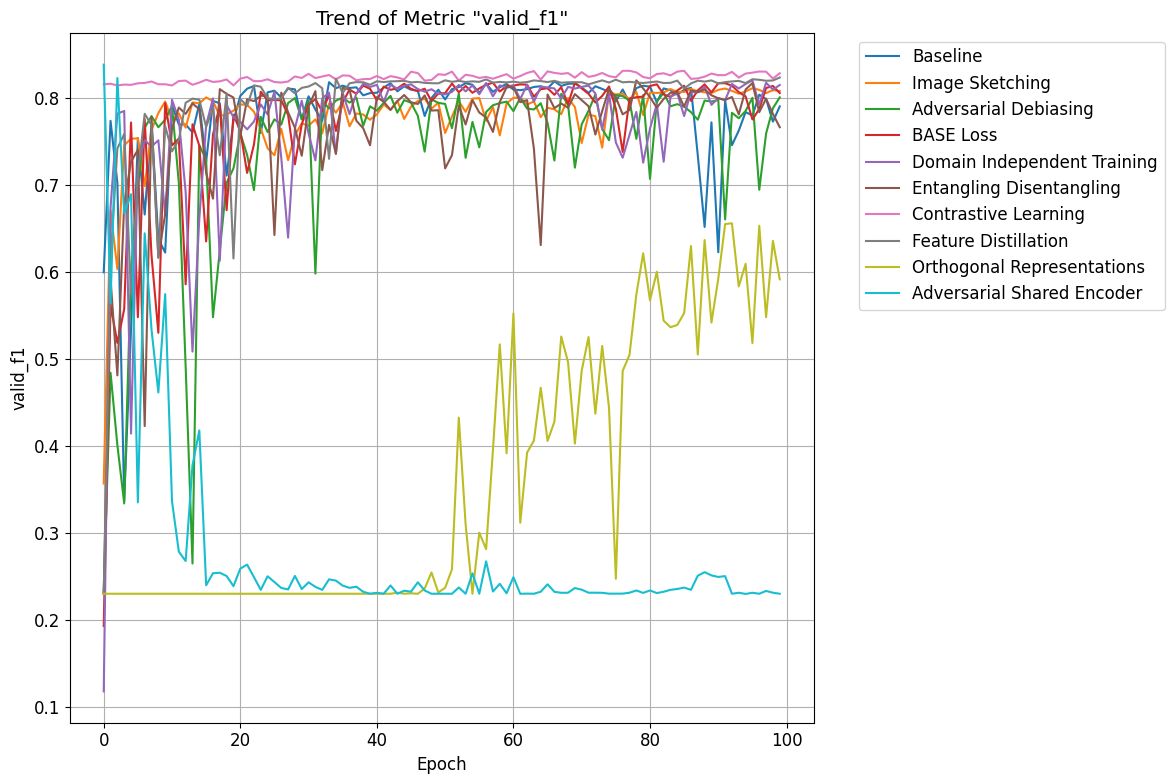

In [5]:
utk_metrics = get_all_dfs("utk_face", "v003_target_age_19", "v004_target_age_19")
plot_metric(utk_metrics, "valid_f1")

## LFW

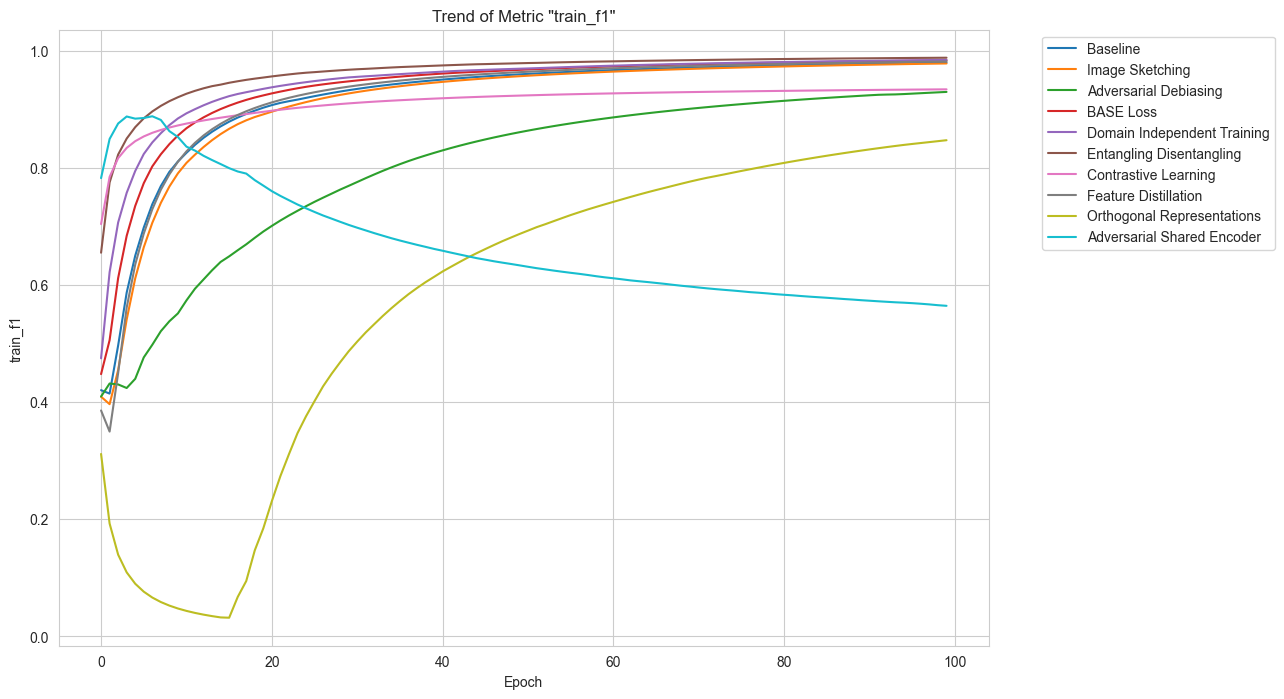

In [34]:
lfw_metrics = get_all_dfs("lfw", "v001_final", "v001_18052024")
plot_metric(lfw_metrics, "train_f1", smoothing_factor=0)

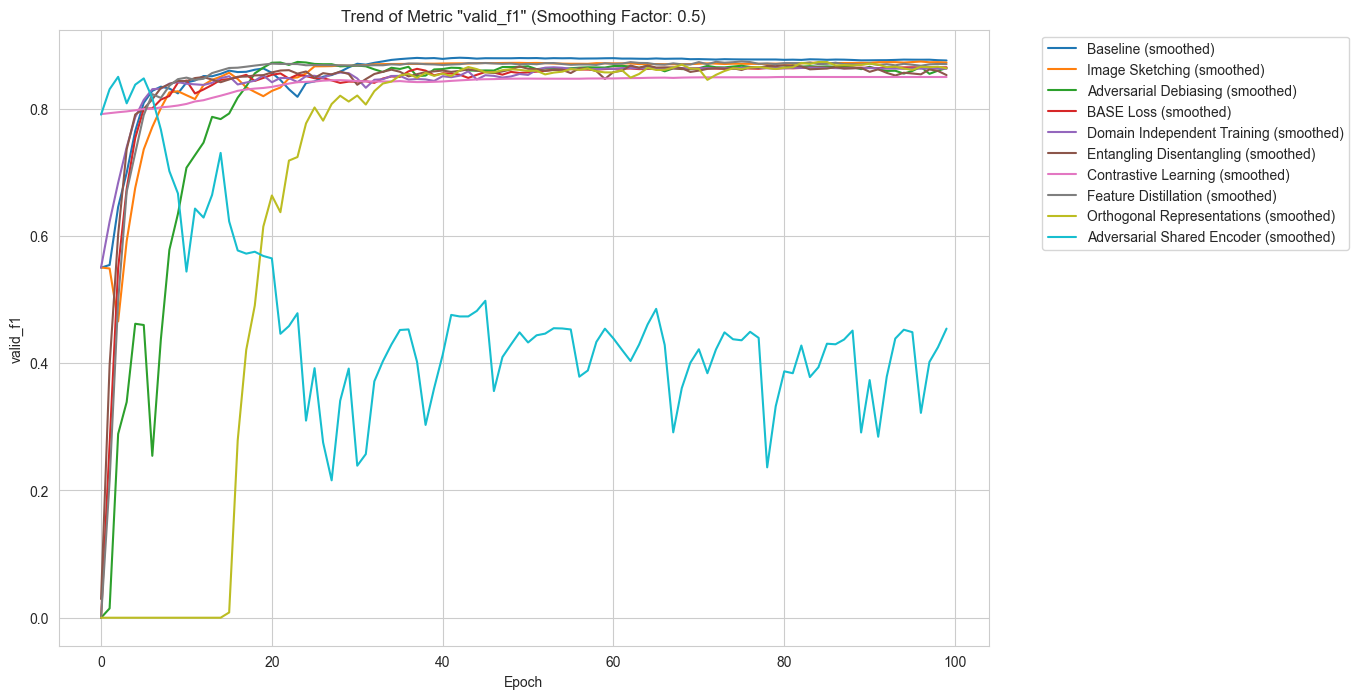

In [19]:
plot_metric(lfw_metrics, "valid_f1", smoothing_factor=0.5)

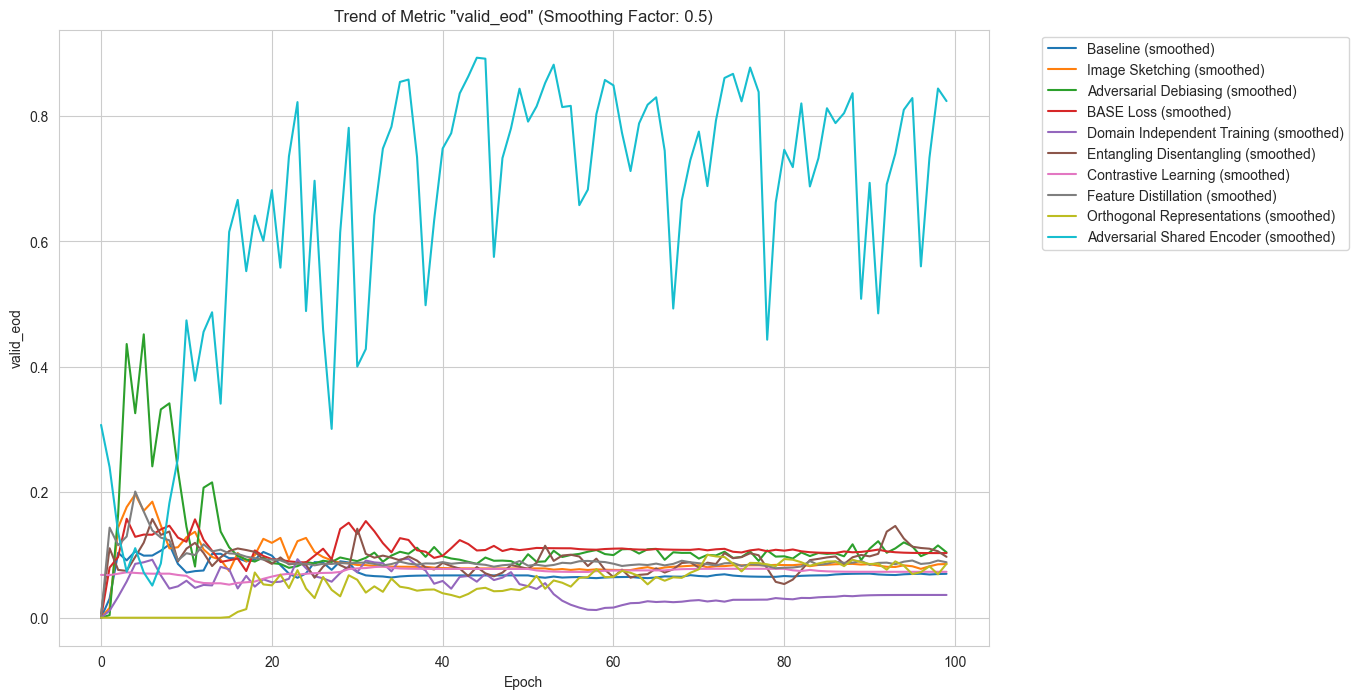

In [20]:
plot_metric(lfw_metrics, "valid_eod", smoothing_factor=0.5)

## UTK

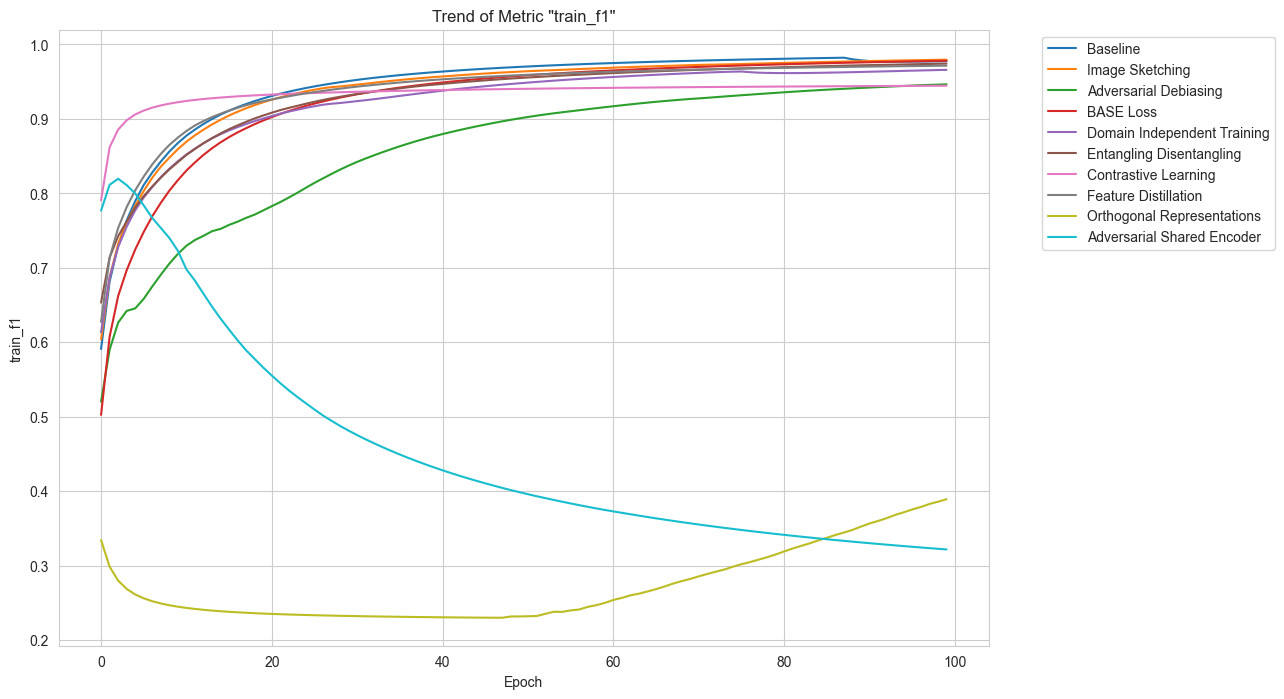

In [59]:
utk_metrics = get_all_dfs("utk_face", "v003_target_age_19", "v004_target_age_19")
plot_metric(utk_metrics, "train_f1")

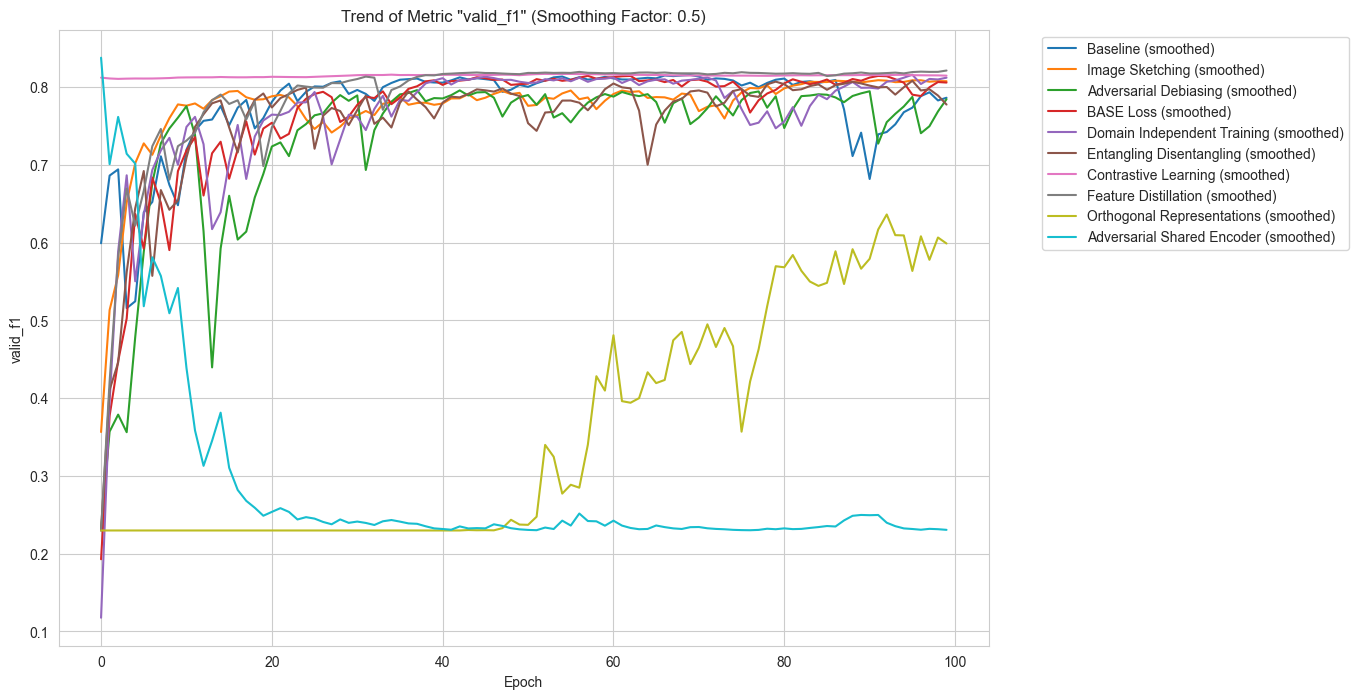

In [60]:
plot_metric(utk_metrics, "valid_f1", smoothing_factor=0.5)

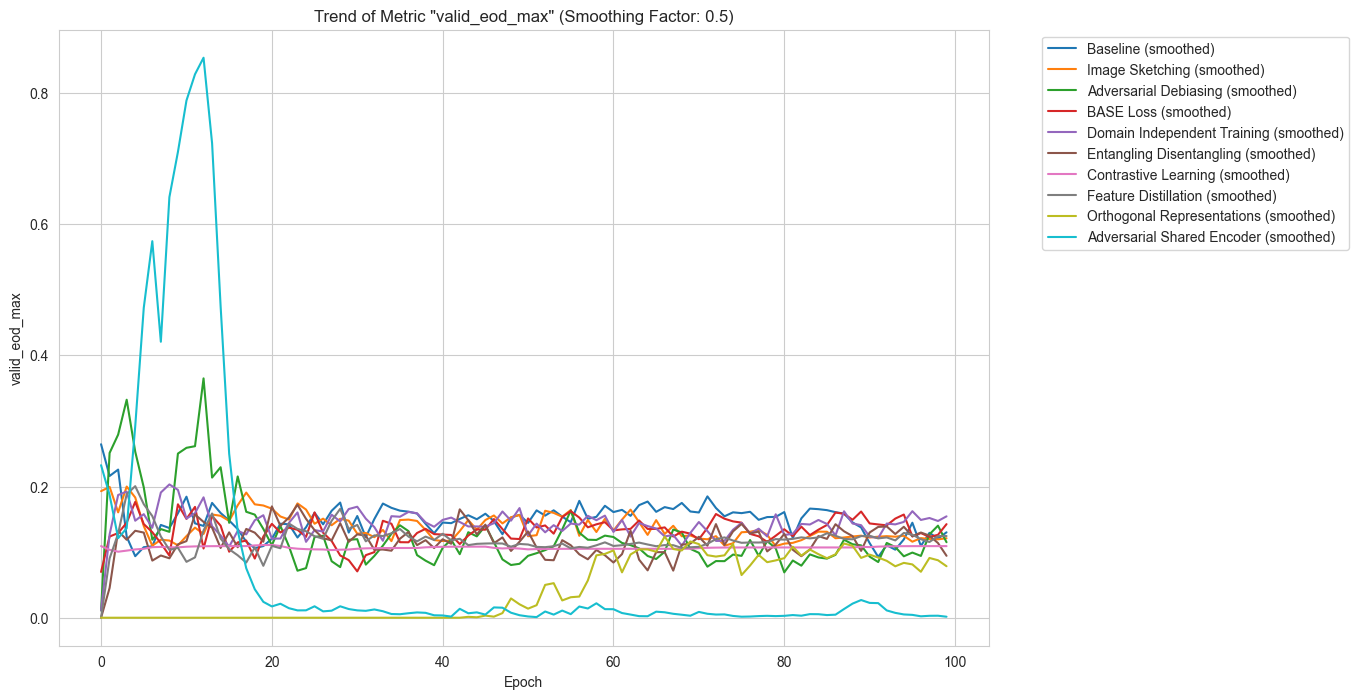

In [61]:
plot_metric(utk_metrics, "valid_eod_max", smoothing_factor=0.5)

## CelebA

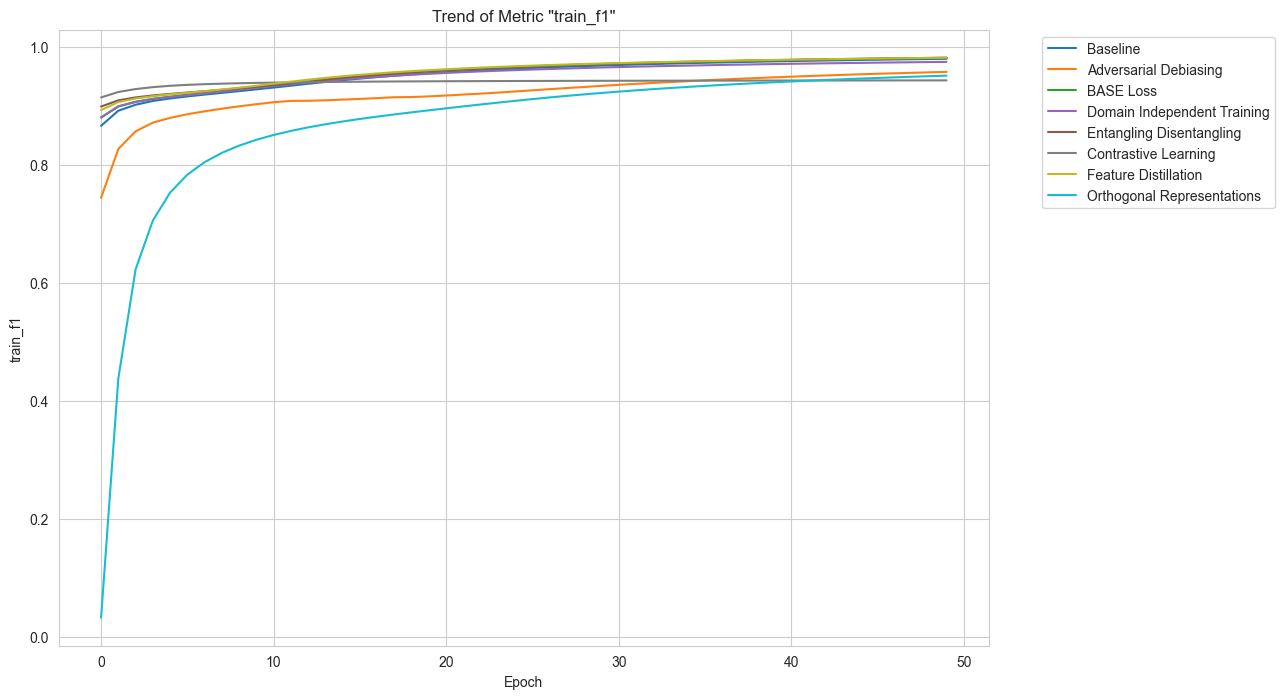

In [40]:
celeba_metrics = get_all_dfs("celeba", "v001_final")
plot_metric(celeba_metrics, "train_f1")

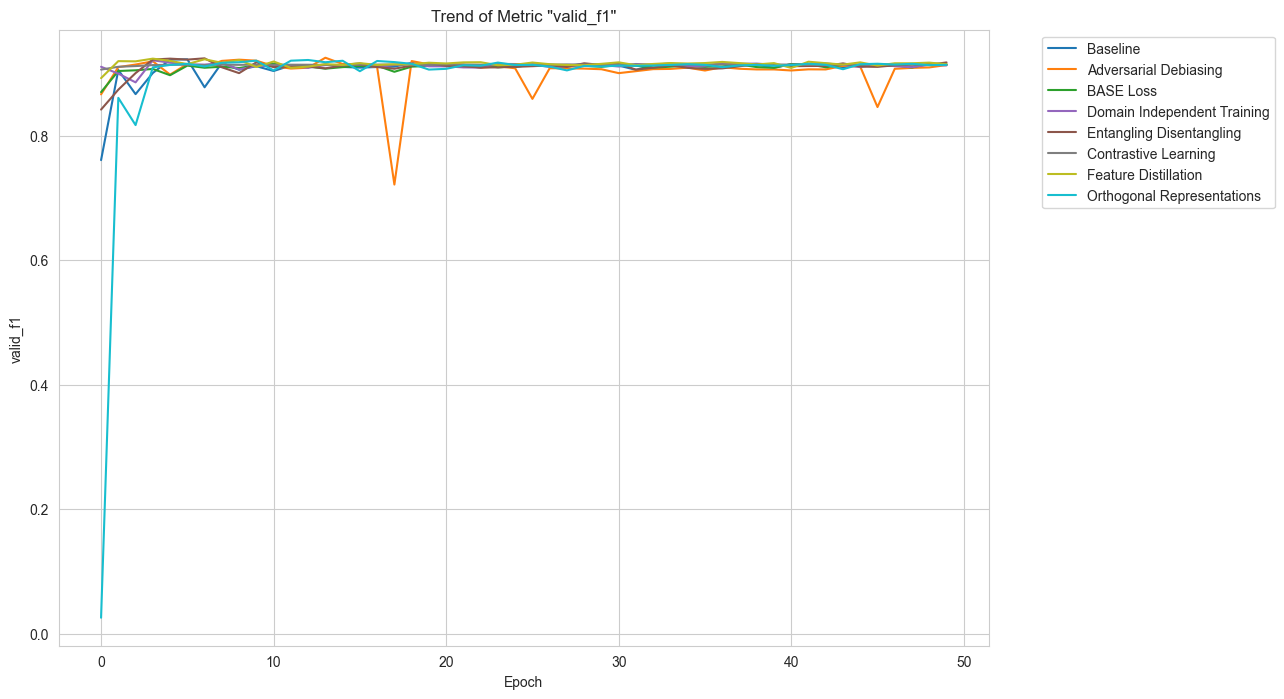

In [41]:
plot_metric(celeba_metrics, "valid_f1")

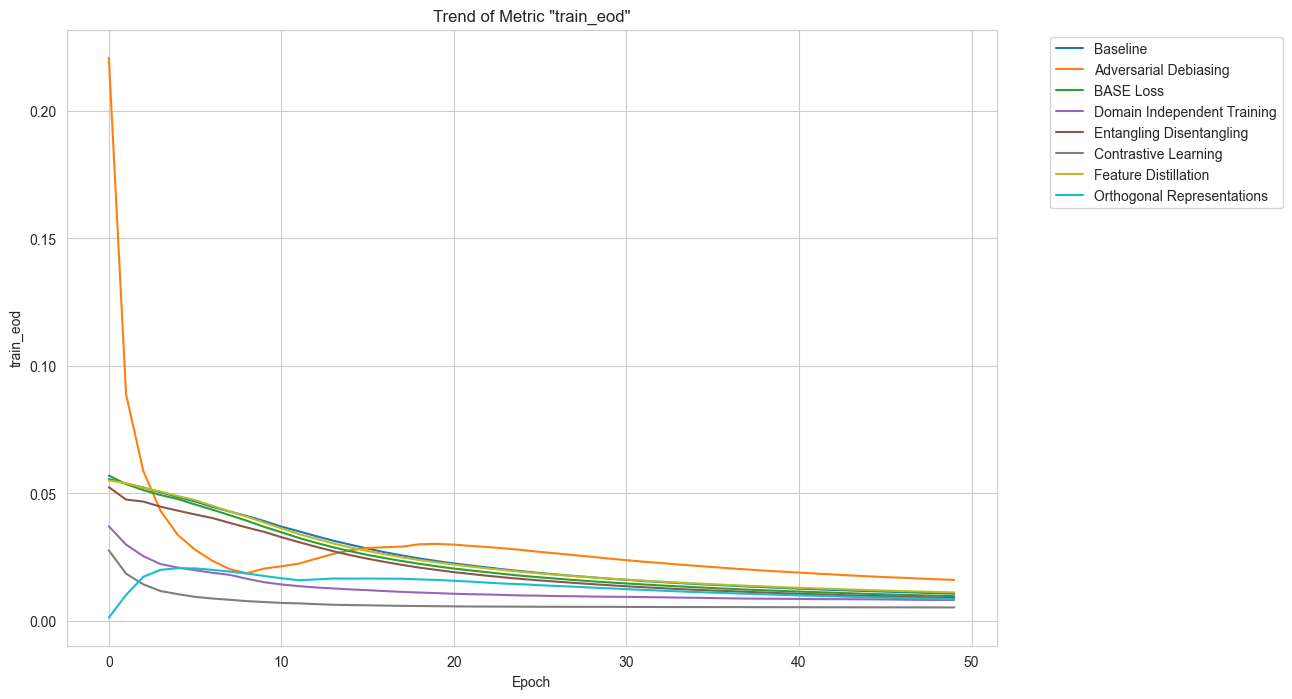

In [47]:
plot_metric(celeba_metrics, "train_eod", smoothing_factor=0)

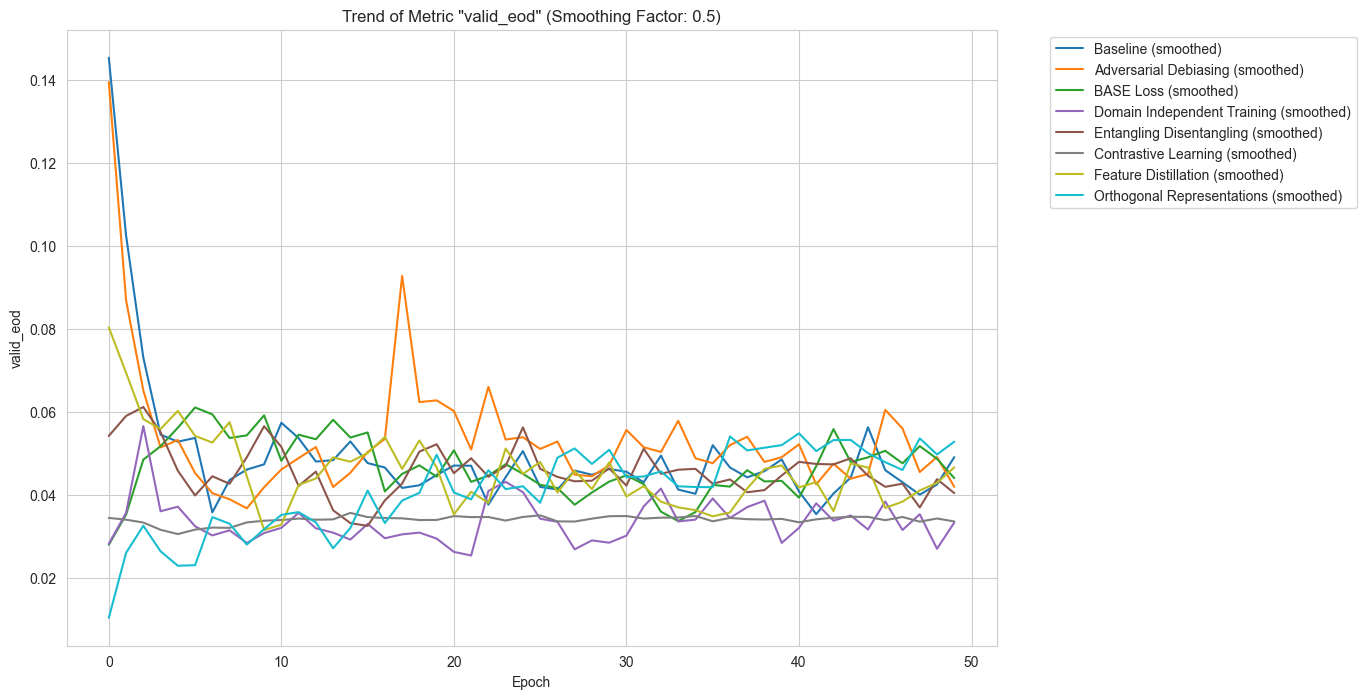

In [48]:
plot_metric(celeba_metrics, "valid_eod", smoothing_factor=0.5)

# Best results

In [48]:
def plot_best_metric_from_dataframes(dataframes, metric):
    best_values = []
    labels = []
    for df, name in dataframes:
        if metric in df.columns:
            if metric in ["train_f1, valid_f1"]:
                best_value = df[metric][20:].max()
            else:
                best_value = df[metric][20:].min()
            labels.append(name)
            best_values.append(best_value)
        else:
            raise ValueError(f"Metric '{metric}' not found in DataFrame")

    sorted_tuples = sorted(zip(labels, best_values), key=lambda x: x[1])
    sorted_names, sorted_best_values = zip(*sorted_tuples)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_names, sorted_best_values, color=['red' if 'baseline' in name else 'blue' for name in sorted_names])
    plt.xlabel('DataFrames')
    plt.ylabel(f'Best {metric}')
    plt.title(f'Best {metric} values from each approach (excluding first 20 epochs)')
    plt.xticks(rotation=90)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

    plt.show()

# LFW results

In [59]:
plot_best_metric_from_dataframes(lfw_metrics, "valid_f1")

In [60]:
plot_best_metric_from_dataframes(lfw_metrics, "valid_eod")

# UTKFace results

In [57]:
plot_best_metric_from_dataframes(utk_metrics, "valid_f1")

In [50]:
plot_best_metric_from_dataframes(utk_metrics, "valid_eod")

## Celeba results

In [61]:
plot_best_metric_from_dataframes(celeba_metrics, "valid_f1")

In [56]:
plot_best_metric_from_dataframes(celeba_metrics, "valid_eod")

# LFW biased target

Looks like contrastive learning only works if target and sensitive feature are balanced

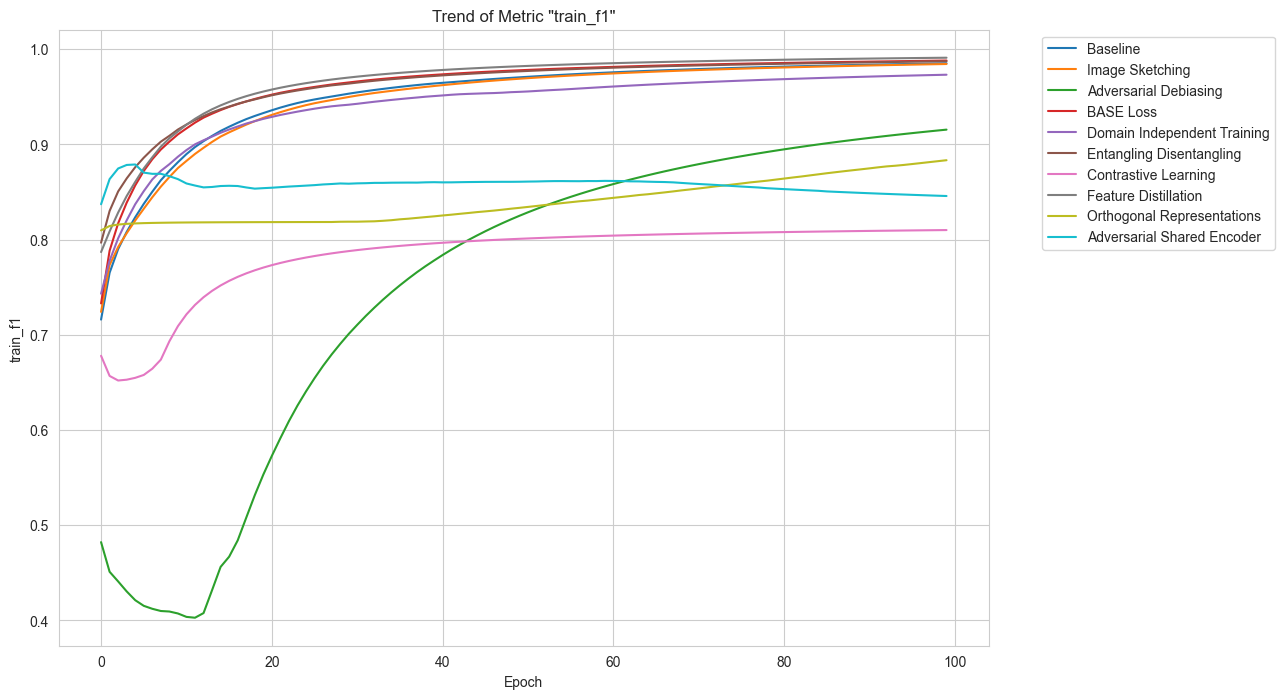

In [49]:
lfw_big_nose_metrics = get_all_dfs("lfw", "v001_target_big_nose", baseline_version="v001_target_big_nose")
plot_metric(lfw_big_nose_metrics, "train_f1")

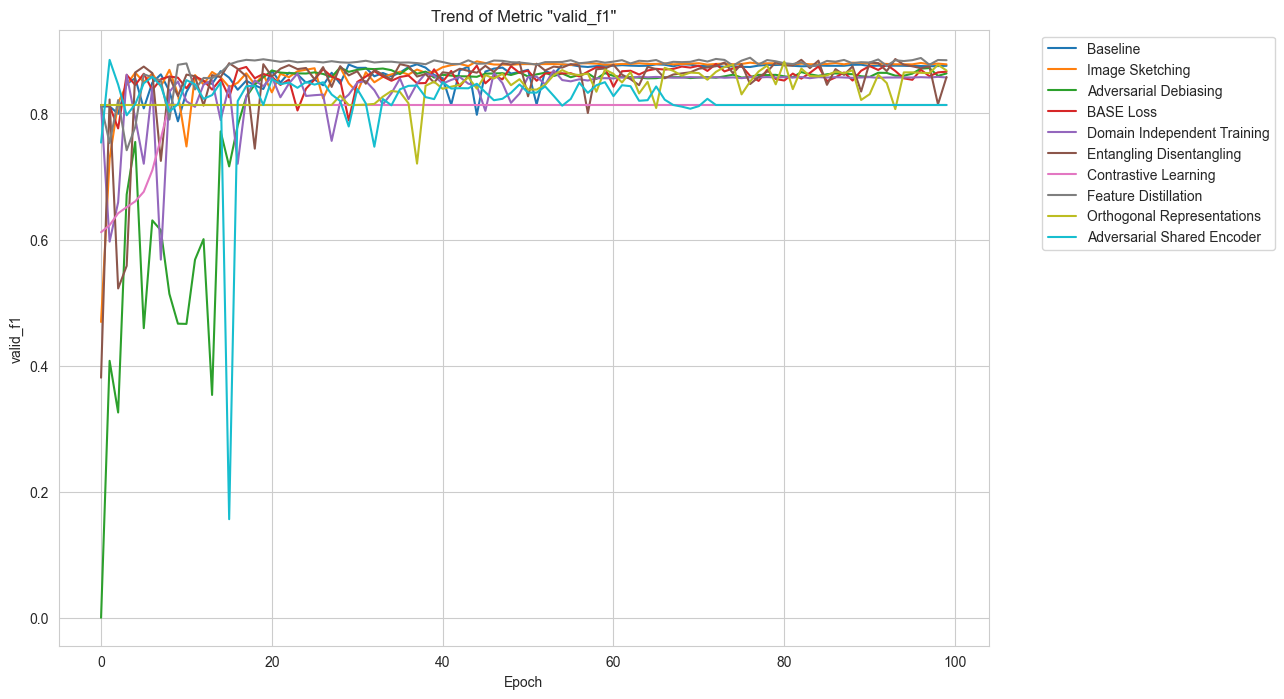

In [50]:
plot_metric(lfw_big_nose_metrics, "valid_f1")

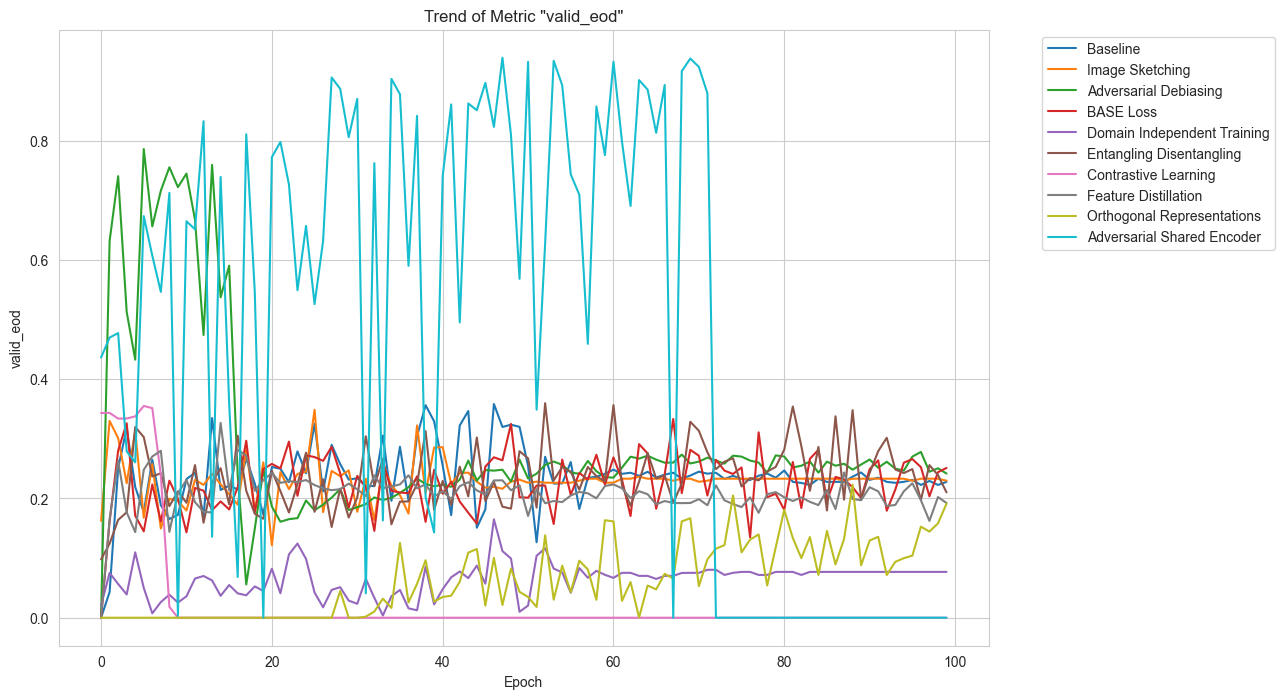

In [51]:
plot_metric(lfw_big_nose_metrics, "valid_eod")

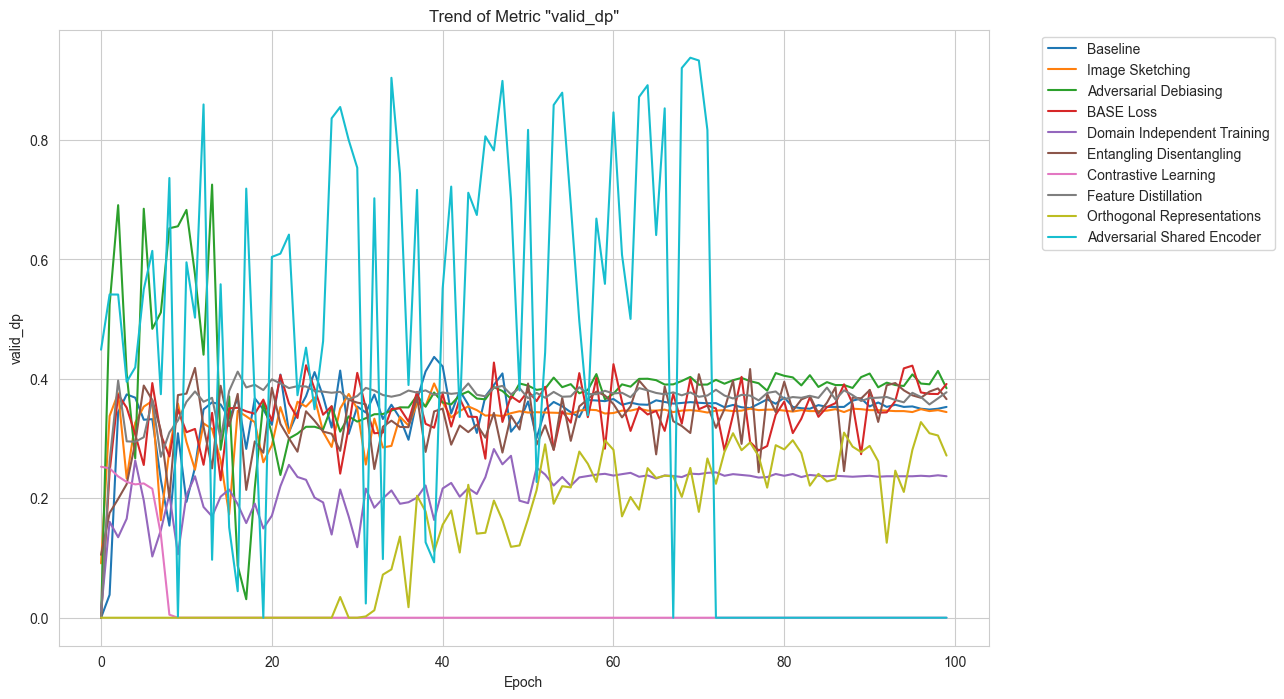

In [52]:
plot_metric(lfw_big_nose_metrics, "valid_dp")

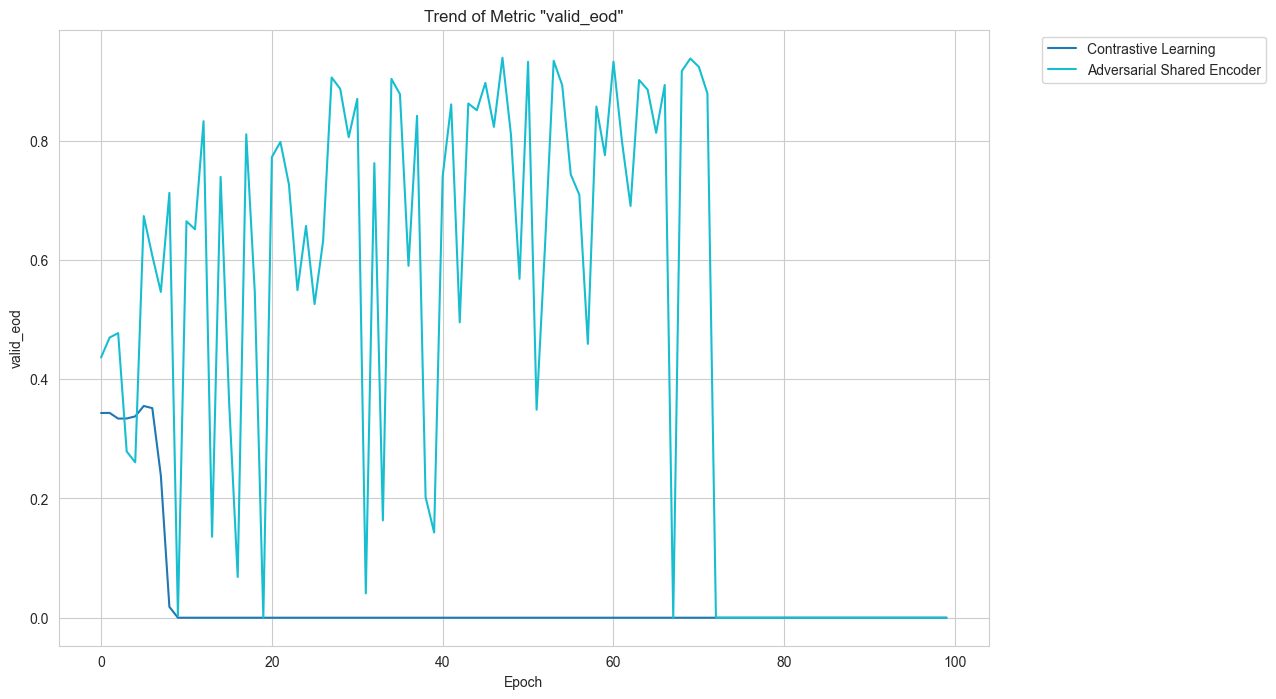

In [53]:
plot_metric([lfw_big_nose_metrics[6], lfw_big_nose_metrics[9]], "valid_eod")

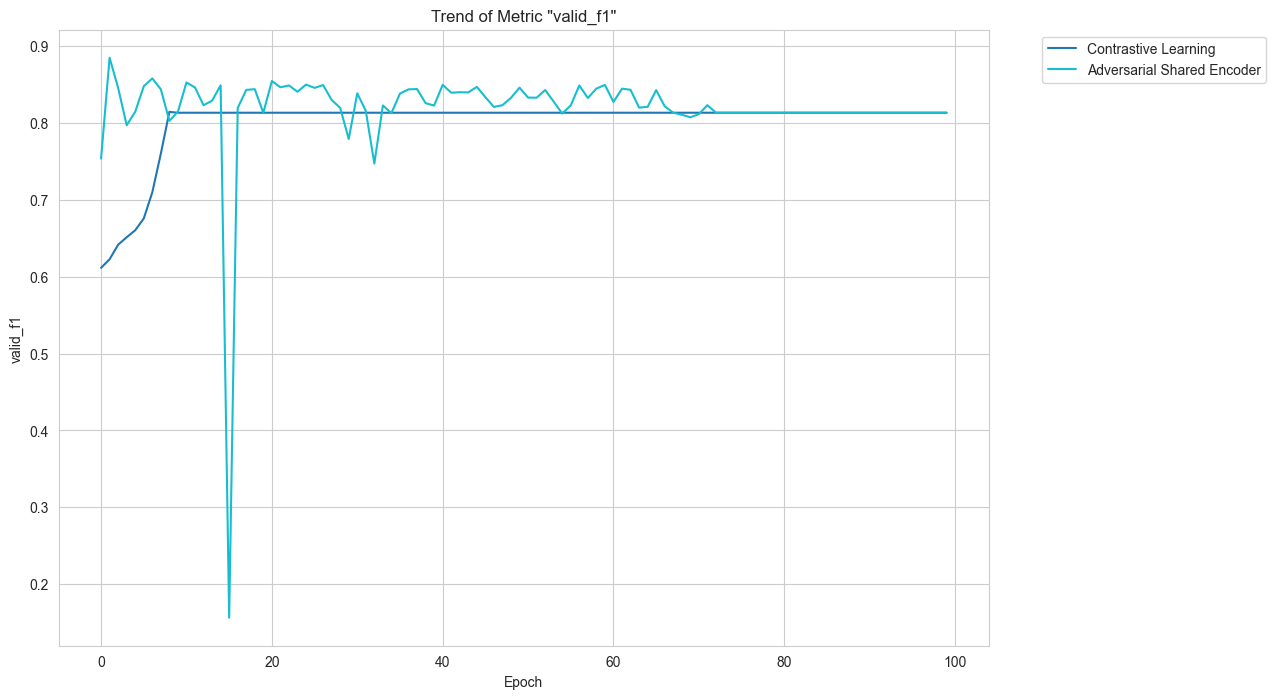

In [54]:
plot_metric([lfw_big_nose_metrics[6], lfw_big_nose_metrics[9]], "valid_f1")

In [ ]:
plot_best_metric_from_dataframes(lfw_big_nose_metrics, "valid_f1")

In [ ]:
plot_best_metric_from_dataframes(lfw_big_nose_metrics, "valid_eod")